In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score 
import cv2

In [6]:
mn=tf.keras.datasets.mnist

In [7]:
(x_train,y_train),(x_test,y_test)=mn.load_data()

Predicted:  5


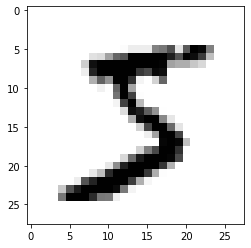

In [8]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
print("Predicted: ",y_train[0])

In [9]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Predicted:  5


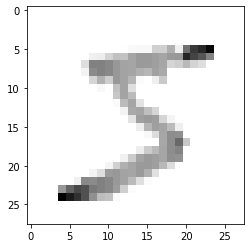

In [10]:
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)
print("Predicted: ",y_train[0])

In [11]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
#RESIZING
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("Training dimentions: ",x_train.shape)
print("Testing dimentions: ",x_test.shape)



Training dimentions:  (60000, 28, 28)
Testing dimentions:  (10000, 28, 28)


TRAINING SAMPLES

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D,MaxPooling2D

In [14]:
model=Sequential()

#1st convolution layer
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))#convolution layer-training model multiple layers of data
model.add(Activation("relu"))# to make the data liner,<0 remove >0
model.add(MaxPooling2D(pool_size=(2,2)))#detect the single maximum value from 2X2 matrics

#2nd convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd convolution layer 
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
#fully converted layer 1
model.add(Flatten())#convert 2d into 3d
model.add(Dense(64))
model.add(Activation("relu"))
         
#fully converted layer 2
model.add(Dense(32))
model.add(Activation("relu"))
          
#last fully converted layer(total 10 layers last one is 10th layer)
model.add(Dense(10))
model.add(Activation("softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [15]:
 model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

Training , Accuracy

In [39]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0193 - accuracy: 0.9933 - val_loss: 0.0629 - val_accuracy: 0.9829
Epoch 2/5
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0155 - accuracy: 0.9949 - val_loss: 0.0671 - val_accuracy: 0.9830
Epoch 3/5
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0146 - accuracy: 0.9954 - val_loss: 0.0736 - val_accuracy: 0.9822
Epoch 4/5
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0888 - val_accuracy: 0.9806
Epoch 5/5
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.0774 - val_accuracy: 0.9831


In [40]:
    test_loss,test_acc=model.evaluate(x_testr,y_test)
    print(test_loss)
    print(test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0690 - accuracy: 0.9849
0.06895475089550018
0.9848999977111816


In [41]:
pred=model.predict([x_testr])
print(pred)

[[3.37010503e-13 6.68313271e-09 8.70569394e-10 ... 1.00000000e+00
  3.20139504e-13 5.37872524e-11]
 [2.16641940e-10 6.64423377e-11 1.00000000e+00 ... 3.52173668e-09
  2.02585518e-11 1.20582789e-11]
 [5.11840903e-10 1.00000000e+00 1.02112416e-12 ... 3.37246238e-11
  2.93809183e-12 1.64331125e-12]
 ...
 [3.52394451e-18 9.41020005e-12 5.32633607e-17 ... 9.38715902e-13
  1.98971672e-11 1.11713784e-10]
 [2.54833012e-11 1.72383254e-11 5.15128901e-13 ... 1.82450764e-16
  4.05554146e-10 4.78030705e-11]
 [3.13019619e-08 1.74567494e-09 1.51815269e-10 ... 4.00239000e-12
  8.56655991e-09 3.16684030e-08]]


In [42]:
print(np.argmax(pred[90]))

3


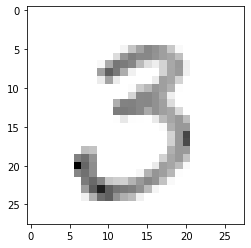

In [43]:
plt.imshow(x_test[90],cmap=plt.cm.binary)

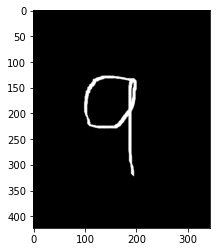

In [107]:
img=cv2.imread("7.png")
plt.imshow(img)

In [108]:
img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

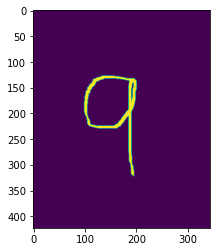

In [109]:
plt.imshow(img)

In [110]:
resized=cv2.resize(img, (28,28),interpolation=cv2.INTER_AREA)


normalize

In [111]:
norm_img=tf.keras.utils.normalize(resized,axis=1)

Make as array

In [112]:
norm_img=np.array(norm_img).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [113]:
norm_img.shape

(1, 28, 28, 1)

In [114]:
pred=model.predict([norm_img])

In [115]:
print(np.argmax(pred))

9
